# Install Packages

In [1]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point, LineString
import matplotlib.pyplot as plt
import json




# Read Files

In [29]:
data = pd.read_json("dsa4264-lta-geospatial/data/cleaned/BusRoutes.json", encoding="utf-8", lines=True, chunksize=1000)

# Combine chunks into a dataframe
df_list = []
for chunk in data:
    df_list.append(chunk)

# Concatenate all chunks into a single dataframe
bus_routes = pd.concat(df_list, ignore_index=True)

print(bus_routes.head())

  ServiceNo Operator  Direction  StopSequence  BusStopCode  Distance  \
0        10     SBST          1             1        75009       0.0   
1        10     SBST          1             2        76059       0.6   
2        10     SBST          1             3        76069       1.1   
3        10     SBST          1             4        96289       2.3   
4        10     SBST          1             5        96109       2.7   

  WD_FirstBus WD_LastBus SAT_FirstBus SAT_LastBus SUN_FirstBus SUN_LastBus  
0         500       2300         0500        2300         0500        2300  
1         502       2302         0502        2302         0502        2302  
2         504       2304         0504        2304         0503        2304  
3         508       2308         0508        2309         0507        2308  
4         509       2310         0509        2311         0508        2309  


In [3]:
# Load BusStops.geojson using GeoPandas
bus_stops = gpd.read_file('dsa4264-lta-geospatial/data/cleaned/BusStops.geojson')
print(bus_stops.head())


   BUS_STOP_N BUS_ROOF_N         LOC_DESC                   geometry
0       65059        B12     ST ANNE'S CH  POINT (103.90130 1.39303)
1       16171        B06  YUSOF ISHAK HSE  POINT (103.77437 1.29892)
2       61101        NIL          BLK 120  POINT (103.86370 1.33564)
3        1239        B01     SULTAN PLAZA  POINT (103.86165 1.30285)
4       17269        B01          BLK 730  POINT (103.76264 1.30492)


In [4]:
rail_line = gpd.read_file('dsa4264-lta-geospatial/data/cleaned/RailLines.geojson')
print(rail_line.head())

    Name                                        Description  GroundLevel  \
0  kml_1  <center><table><tr><th colspan='2' align='cent...  ABOVEGROUND   
1  kml_2  <center><table><tr><th colspan='2' align='cent...  ABOVEGROUND   
2  kml_3  <center><table><tr><th colspan='2' align='cent...  ABOVEGROUND   
3  kml_4  <center><table><tr><th colspan='2' align='cent...  ABOVEGROUND   
4  kml_5  <center><table><tr><th colspan='2' align='cent...  ABOVEGROUND   

  RailType                                           geometry  
0      MRT  LINESTRING Z (103.73650 1.35301 0.00000, 103.7...  
1      MRT  LINESTRING Z (103.73708 1.35164 0.00000, 103.7...  
2      MRT  LINESTRING Z (103.71328 1.35252 0.00000, 103.7...  
3      MRT  LINESTRING Z (103.71320 1.35265 0.00000, 103.7...  
4      MRT  LINESTRING Z (103.70767 1.34888 0.00000, 103.7...  


In [30]:
rail_stn = gpd.read_file('dsa4264-lta-geospatial/data/cleaned/RailStationsMerged.geojson')
print(rail_stn.head())


      Name                                        Description StationType  \
0  kml_105  <center><table><tr><th colspan='2' align='cent...         MRT   
1  kml_154  <center><table><tr><th colspan='2' align='cent...         MRT   
2    kml_1  <center><table><tr><th colspan='2' align='cent...         MRT   
3  kml_163  <center><table><tr><th colspan='2' align='cent...         MRT   
4  kml_243  <center><table><tr><th colspan='2' align='cent...         MRT   

      StationName StationCode    StationLine  \
0       Admiralty        NS10    North-South   
1        Aljunied         EW9      East-West   
2      Ang Mo Kio        NS16    North-South   
3   Aviation Park         CR2   Cross Island   
4  Bahar Junction         JS7  Jurong Region   

                                            geometry  
0  POLYGON Z ((103.80013 1.44004 0.00000, 103.800...  
1  POLYGON Z ((103.88373 1.31643 0.00000, 103.883...  
2  POLYGON Z ((103.84988 1.36925 0.00000, 103.849...  
3  POLYGON Z ((104.00210 1.3

# Clean up + Create Bus Line Strings

In [5]:
# Merge Bus Stop Coordinates with Bus Routes
# Ensure that BusStopCode is of the same type for both DataFrames (string)
bus_stops['BusStopCode'] = bus_stops['BUS_STOP_N'].astype(str)
bus_routes['BusStopCode'] = bus_routes['BusStopCode'].astype(str)

# Merge bus_routes with bus_stops to get geometry for each bus stop
merged_bus_data = bus_routes.merge(bus_stops[['BusStopCode', 'geometry']], on='BusStopCode', how='left')

# Drop rows without geometry
merged_bus_data = merged_bus_data.dropna(subset=['geometry'])

# Convert to GeoDataFrame
bus_routes_geo = gpd.GeoDataFrame(merged_bus_data, geometry='geometry')

In [6]:
### Set Coordinate Reference System (CRS)
bus_routes_geo.set_crs(epsg=4326, inplace=True)

,ServiceNo,Operator,Direction,StopSequence,BusStopCode,Distance,WD_FirstBus,WD_LastBus,SAT_FirstBus,SAT_LastBus,SUN_FirstBus,SUN_LastBus,geometry
0,10,SBST,1,1,75009,0.0,500,2300,0500,2300,0500,2300,POINT (103.94364 1.35480)
1,10,SBST,1,2,76059,0.6,502,2302,0502,2302,0502,2302,POINT (103.94164 1.35303)
2,10,SBST,1,3,76069,1.1,504,2304,0504,2304,0503,2304,POINT (103.94210 1.34861)
3,10,SBST,1,4,96289,2.3,508,2308,0508,2309,0507,2308,POINT (103.94836 1.34007)
4,10,SBST,1,5,96109,2.7,509,2310,0509,2311,0508,2309,POINT (103.95069 1.33732)
...,...,...,...,...,...,...,...,...,...,...,...,...,...
25589,9B,SBST,1,25,95091,9.5,741,817,-,-,-,-,POINT (103.99968 1.38721)
25590,9B,SBST,1,26,95131,9.7,742,818,-,-,-,-,POINT (103.99977 1.38517)
25591,9B,SBST,1,27,95141,10.2,744,820,-,-,-,-,POINT (103.99816 1.38135)
25592,9B,SBST,1,28,95061,10.6,745,821,-,-,-,-,POINT (103.99649 1.37743)


In [8]:
## Step 3: Create LineStrings for Entire Bus Routes
# Group bus stops by ServiceNo and Direction and create LineStrings for each bus route
bus_routes_lines = (
    bus_routes_geo.groupby(['ServiceNo', 'Direction'])
    .apply(lambda x: LineString(x.sort_values('StopSequence')['geometry'].tolist()))
    .reset_index()
    .rename(columns={0: 'geometry'})
)
# Convert to GeoDataFrame
bus_routes_lines = gpd.GeoDataFrame(bus_routes_lines, geometry='geometry')

# Create MRT Line STring with MRT Stations

In [79]:
rail_stn = rail_stn.to_crs(epsg=32648)

#  Group the stations by MRT line
station_groups = rail_stn.groupby('StationLine')

# Dictionary to store LineStrings for each MRT line
line_strings_per_station_line = {}

# Iterate over each MRT line group and create a sorted LineString
for line_name, group in station_groups:
    # Sort the stations by their longitude (x-coordinate) or latitude (y-coordinate)
    group['centroid_x'] = group.geometry.centroid.x  # Get x-coordinate of the centroid
    sorted_group = group.sort_values('centroid_x')  # Sort by the x-coordinate

    # Extract the station centroids, names, and codes
    station_points = sorted_group.geometry.centroid.tolist()
    station_names = sorted_group['StationName'].tolist()
    station_codes = sorted_group['StationCode'].tolist()

    # Initialize a set to track unique station codes
    unique_station_codes = set()

    # Initialize lists to store filtered stations (with unique codes)
    filtered_station_points = []
    filtered_station_names = []
    filtered_station_codes = []

    #Filter out stations with duplicate station codes and None values
    for point, name, code in zip(station_points, station_names, station_codes):
        if code not in unique_station_codes and point is not None:
            # Add the station to the filtered lists
            filtered_station_points.append(point)
            filtered_station_names.append(name)
            filtered_station_codes.append(code)

            # Mark this station code as seen
            unique_station_codes.add(code)

    # create a LineString from the filtered station points
    if filtered_station_points:  # Check if we have valid points
        try:
            mrt_line = LineString(filtered_station_points)
        
            # Store the data in the dictionary
            line_strings_per_station_line[line_name] = {
                'LineString': mrt_line,
                'StationNames': filtered_station_names,
                'StationCodes': filtered_station_codes,
                'StationPoints': filtered_station_points
            }
        except TypeError as e:
            print(f"Error creating LineString for {line_name}: {e}")
            continue


for line_name, line_data in line_strings_per_station_line.items():
    print(f"MRT Line: {line_name}")
    print(f"  LineString: {line_data['LineString']}")
    print(f"  Station Names: {line_data['StationNames']}")
    print(f"  Station Codes: {line_data['StationCodes']}")
    print(f"  Station Points (centroids): {line_data['StationPoints']}")
    print("\n")


MRT Line: Bukit Panjang LRT
  LineString: LINESTRING (360309.02665248397 153140.43489782163, 360411.4135443503 152601.55104197608, 360829.65645777585 152414.91803836866, 361346.738541528 152198.74302797826, 361829.0926117 152415.808039669, 362235.18607789645 152463.08529625798, 362311.69349107187 152865.9969921109, 362789.70535716106 152319.09143693538, 363123.2329007897 153424.67695059875, 363254.155604726 153068.20525107317, 363302.8331993368 152138.82839584383, 363456.7690743054 152568.69744984462)
  Station Names: ['Choa Chu Kang', 'South View', 'Keat Hong', 'Teck Whye', 'Phoenix', 'Bukit Panjang', 'Senja', 'Petir', 'Segar', 'Fajar', 'Pending', 'Bangkit']
  Station Codes: ['BP1', 'BP2', 'BP3', 'BP4', 'BP5', 'BP6', 'BP13', 'BP7', 'BP11', 'BP10', 'BP8', 'BP9']
  Station Points (centroids): [<POINT (360309.027 153140.435)>, <POINT (360411.414 152601.551)>, <POINT (360829.656 152414.918)>, <POINT (361346.739 152198.743)>, <POINT (361829.093 152415.808)>, <POINT (362235.186 152463.085)>

is this a problem

In [36]:
# Check for missing or invalid geometry (rows where geometry is invalid
missing_geometry = rail_stn[rail_stn['geometry'].isna()]
print("Stations with missing geometry:")
print(missing_geometry[['StationLine', 'StationName', 'StationCode']])

Stations with missing geometry:
           StationLine StationName StationCode
123  Bukit Panjang LRT    Jelapang        BP12
243        Punggol LRT     Sam Kee         PW1
320             Circle   one-north        CC23


# Visualise MRT Line String

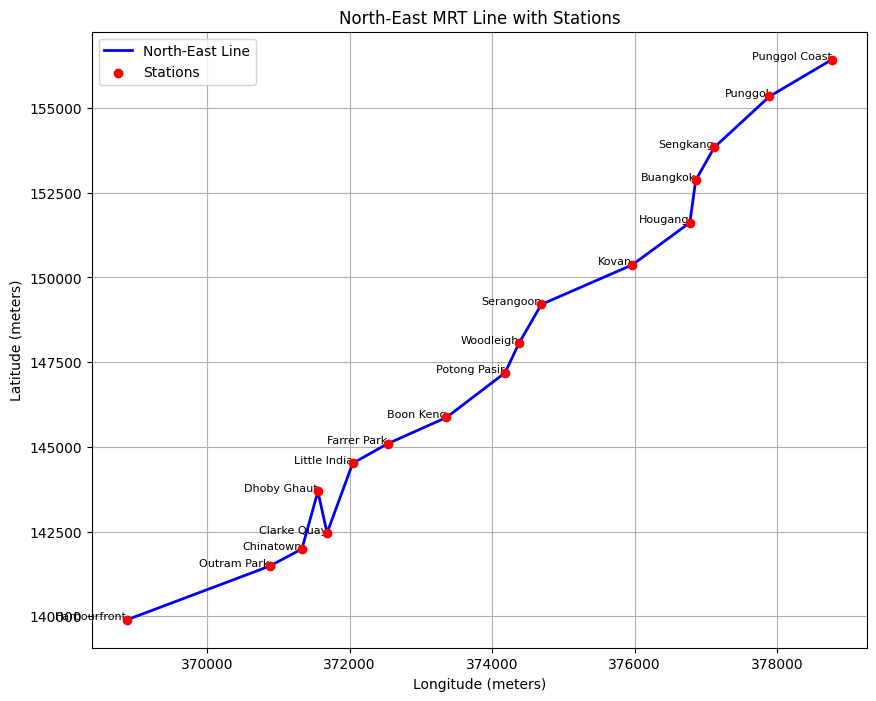

In [37]:

target_line = "North-East" #change accordingly

# Check if the line exists in the processed data
if target_line in line_strings_per_station_line:
    line_data = line_strings_per_station_line[target_line]

    # Extract the LineString, station points, and station names
    mrt_line = line_data['LineString']
    station_points = line_data['StationPoints']
    station_names = line_data['StationNames']

    # Plot the MRT line
    plt.figure(figsize=(10, 8))
    
    # Plot the LineString representing the MRT line
    x, y = mrt_line.xy  # Extract x and y coordinates from the LineString
    plt.plot(x, y, label=f'{target_line} Line', color='blue', linewidth=2)
    
    # Plot the station points on the map
    station_x = [point.x for point in station_points]
    station_y = [point.y for point in station_points]
    plt.scatter(station_x, station_y, color='red', label='Stations', zorder=5)

    # Annotate the station names
    for i, name in enumerate(station_names):
        plt.text(station_x[i], station_y[i], name, fontsize=8, ha='right')

    # Set the title and labels
    plt.title(f'{target_line} MRT Line with Stations')
    plt.xlabel('Longitude (meters)')
    plt.ylabel('Latitude (meters)')
    
    # Add a legend
    plt.legend()
    
    # Show the plot
    plt.grid(True)
    plt.show()

else:
    print(f"No data available for MRT Line: {target_line}")


# Segment MRT Stations

In [39]:
# Function to segment a LineString into 1 km sections
def segment_line_by_distance(line, distance=1000):
    segments = []  # List to store the line segments
    current_distance = 0  # Start distance

    # Iterate over the entire length of the line and create segments of the specified distance
    while current_distance < line.length:
        # Calculate the start and end points for each segment
        start_point = line.interpolate(current_distance)
        end_point = line.interpolate(min(current_distance + distance, line.length))
        
        # Create a LineString for the segment and add it to the list
        segments.append(LineString([start_point, end_point]))
        
        # Move to the next segment
        current_distance += distance

    return segments  # Return the list of 1 km line segments

# Dictionary to store segmented lines for each MRT line
segmented_lines_per_station_line = {}

# Iterate through each MRT line in the dataset
for line_name, line_info in line_strings_per_station_line.items():
    # Get the LineString and station details for each line
    mrt_line = line_info['LineString']
    station_points = line_info['StationPoints']
    station_names = line_info['StationNames']

    # Segment the MRT line into 1 km sections
    mrt_segments = segment_line_by_distance(mrt_line, 1000)

    # Store the segments for this MRT line
    segmented_lines_per_station_line[line_name] = {
        'segments': mrt_segments,
        'station_names': station_names,
        'station_points': station_points
    }


# Visualise Line String Segments

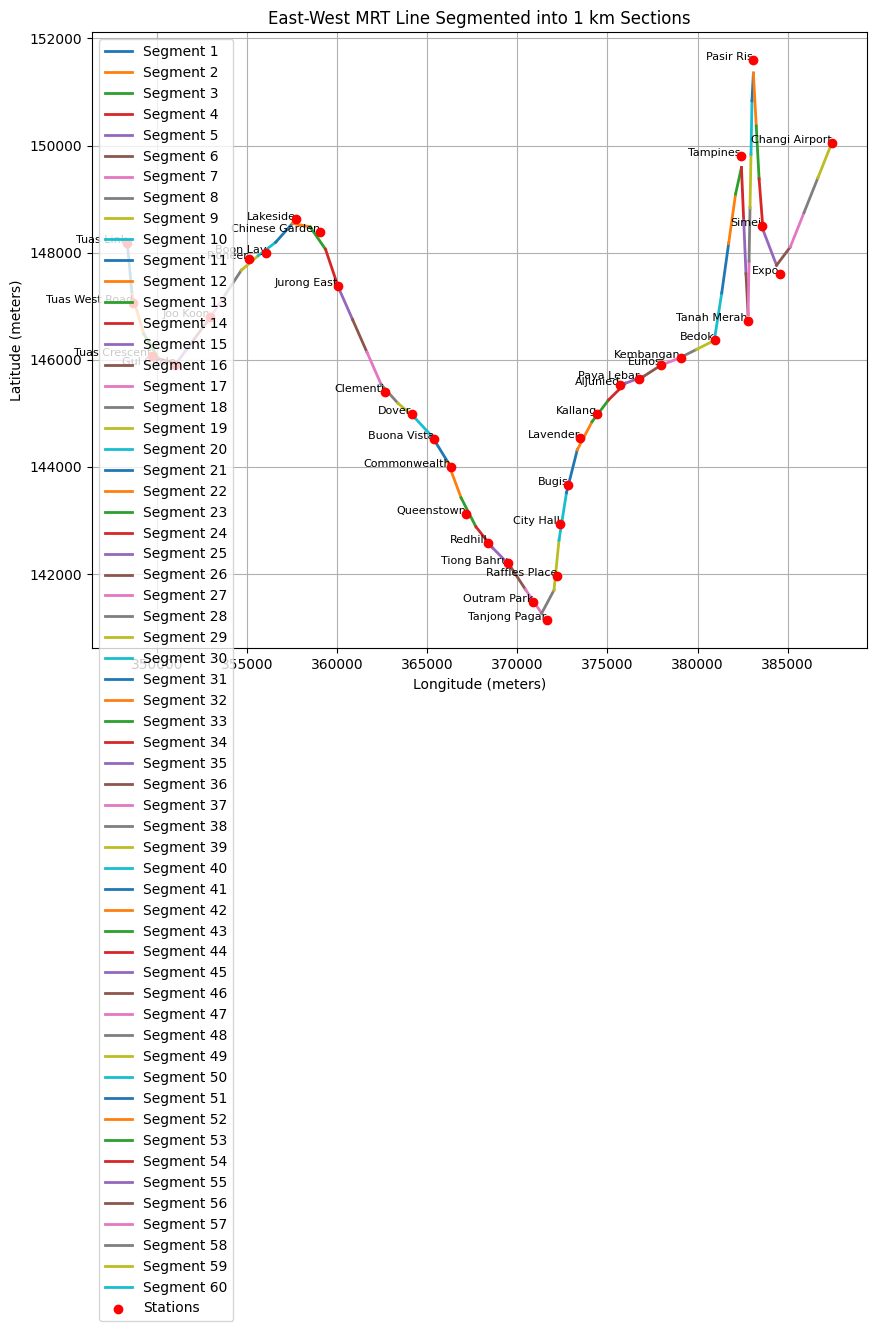

Segment 1: LINESTRING (348331.38594161085 148182.630654708, 348598.27149314905 147218.90242414703)
Segment 2: LINESTRING (348598.27149314905 147218.90242414703, 349245.75056721165 146484.65947460377)
Segment 3: LINESTRING (349245.75056721165 146484.65947460377, 350076.9438204177 146019.44652930694)
Segment 4: LINESTRING (350076.9438204177 146019.44652930694, 351063.77688428725 145936.61282810435)
Segment 5: LINESTRING (351063.77688428725 145936.61282810435, 351974.11107873305 146350.48678768947)


In [42]:
target_line = "East-West"  # change to visualize other lines
if target_line in segmented_lines_per_station_line:
    segmented_data = segmented_lines_per_station_line[target_line]

    mrt_segments = segmented_data['segments']
    station_points = segmented_data['station_points']
    station_names = segmented_data['station_names']

    # Visualize the segments on the map
    plt.figure(figsize=(10, 8))

    # Plot each segment in a different color
    for idx, segment in enumerate(mrt_segments):
        x_seg, y_seg = segment.xy  # Extract x and y coordinates for the segment
        plt.plot(x_seg, y_seg, label=f'Segment {idx+1}', linewidth=2)

    # Plot the station points
    station_x = [point.x for point in station_points]
    station_y = [point.y for point in station_points]
    plt.scatter(station_x, station_y, color='red', label='Stations', zorder=5)

    # Annotate the station names
    for i, name in enumerate(station_names):
        plt.text(station_x[i], station_y[i], name, fontsize=8, ha='right')

    # Set the title and labels
    plt.title(f'{target_line} MRT Line Segmented into 1 km Sections')
    plt.xlabel('Longitude (meters)')
    plt.ylabel('Latitude (meters)')

    # Add a legend
    plt.legend()
    
    # Show the plot
    plt.grid(True)
    plt.show()

    # Print the first few segments for verification
    for idx, segment in enumerate(mrt_segments[:5]):  # Print first 5 segments
        print(f"Segment {idx+1}: {segment}")

else:
    print(f"No data available for MRT Line: {target_line}")

# PHASE 1: Conduct Initial Checks for Distance Proximity
Compare the bus route's entire geometry with the MRT line to check if they are near in distance. If there's no overlap, discard that bus route.
Reduces the number of comparisons needed.

In [62]:
if bus_routes_lines.crs is None:
    bus_routes_lines = bus_routes_lines.set_crs(epsg=4326)

#Reproject bus routes to the same CRS as the MRT lines (UTM Zone 48N - EPSG:32648)
bus_routes_lines = bus_routes_lines.to_crs(epsg=32648)

mrt_buffers = {}  # Dictionary to store buffers for each MRT line

for line_name, line_data in line_strings_per_station_line.items():
    mrt_line = line_data['LineString']
    mrt_buffer = mrt_line.buffer(buffer_distance)  # Create a buffer around the MRT line
    mrt_buffers[line_name] = mrt_buffer  # Store the buffer

#Check if any bus route is near any MRT line buffer
overlap_results = []

for line_name, mrt_buffer in mrt_buffers.items():
    for idx, bus_route in bus_routes_lines.iterrows():
        if bus_route.geometry.intersects(mrt_buffer):
            overlap_length = bus_route.geometry.intersection(mrt_buffer).length  # Get overlap length
            overlap_results.append({
                'MRT_Line': line_name,
                'Bus_ServiceNo': bus_route['ServiceNo'],
                'Direction': bus_route['Direction'],  # Keep track of direction for later
                'Bus_Route_Length_m': bus_route.geometry.length,  # Length of the bus route in meters
                'Overlap_Length_m': overlap_length  # Overlap length in meters
            })

overlap_df = pd.DataFrame(overlap_results)

#Sort the DataFrame by 'Overlap_Length_m' in descending order
overlap_df_sorted = overlap_df.sort_values(by='Overlap_Length_m', ascending=False)

# For each bus service, keep only the direction with the greater overlap
# Group by 'Bus_ServiceNo' and 'Direction', take the max 'Overlap_Length_m' for each service
overlap_df_max = overlap_df_sorted.groupby(['Bus_ServiceNo', 'Direction']).apply(lambda x: x.loc[x['Overlap_Length_m'].idxmax()]).reset_index(drop=True)

# Drop duplicates for each 'Bus_ServiceNo' while keeping only the row with the maximum 'Overlap_Length_m'
overlap_df_unique = overlap_df_max.sort_values(by='Overlap_Length_m', ascending=False).drop_duplicates(subset=['Bus_ServiceNo'], keep='first')

# Output the final DataFrame
overlap_df_unique



,MRT_Line,Bus_ServiceNo,Direction,Bus_Route_Length_m,Overlap_Length_m
409,East-West,518,1,50208.052219,46998.117838
400,East-West,502,1,48413.868050,45787.362183
349,East-West,36,1,44616.364459,42752.990218
567,North-South,857,1,38833.342634,38833.342634
601,Cross Island,89,1,38696.750127,36442.816165
...,...,...,...,...,...
300,East-West,284,1,1273.730889,1273.730889
658,Thomson East Coast,962C,1,1250.818701,1250.818701
682,North-South,973A,1,1249.539533,1249.539533
541,Sengkang LRT,84A,1,941.473563,941.473563


# PHASE 2: Segment Coverage Calculation for Bus Routes and MRT Lines
To determine how much of an MRT line's segments are covered by a bus route. The MRT lines are segmented into equal parts, and we check which of these segments overlap with the corresponding bus route. This analysis helps us assess how parallel the bus route is to the MRT line in terms of spatial coverage.

Steps:

Segmentation: Each MRT line is divided into segments of a fixed length. These segments represent portions of the MRT line.

Intersection Check: For each bus route, we check how many of the MRT segments it intersects. This is done by comparing the geometry of the bus route with each MRT segment.

Coverage Calculation: We calculate the percentage of MRT segments that are covered by the bus route:

In [78]:
# Initialize a list to store the results
segment_coverage_results = []

# Iterate through each row in overlap_df_unique
for idx, row in overlap_df_unique.iterrows():
    # Fetch the geometry of the bus route (LineString) based on ServiceNo and Direction
    bus_geometry = bus_routes_lines.loc[
        (bus_routes_lines['ServiceNo'] == row['Bus_ServiceNo']) &
        (bus_routes_lines['Direction'] == row['Direction'])
    ].geometry.iloc[0]
    
    # Fetch the MRT Line geometry
    mrt_line = line_strings_per_station_line[row['MRT_Line']]['LineString']
    
    # Segment the MRT line 
    mrt_segments = segment_line_by_distance(mrt_line, 1000)  # EDIT

    # Calculate how many segments are covered by the bus route
    total_segments = len(mrt_segments)
    covered_segments = 0

    for segment in mrt_segments:
        if bus_geometry.intersects(segment):  # Check if the bus route intersects the MRT segment
            covered_segments += 1

    # Calculate the percentage of MRT segments covered by the bus route
    coverage_percentage = (covered_segments / total_segments) * 100 if total_segments > 0 else 0
    
    # Append the result to the list
    segment_coverage_results.append({
        'MRT_Line': row['MRT_Line'],
        'Bus_ServiceNo': row['Bus_ServiceNo'],
        'Direction': row['Direction'],
        'Bus_Route_Length_m': row['Bus_Route_Length_m'],
        'Overlap_Length_m': row['Overlap_Length_m'],
        'Coverage_Percentage': coverage_percentage
    })

# Convert the results to a DataFrame
segment_coverage_df = pd.DataFrame(segment_coverage_results)

# Filter the DataFrame to only include rows with a Coverage_Percentage > 0
segment_coverage_df_filtered = segment_coverage_df[segment_coverage_df['Coverage_Percentage'] > 0]

# Sort by coverage percentage in descending order
segment_coverage_df_sorted = segment_coverage_df_filtered.sort_values(by='Coverage_Percentage', ascending=False)

# Output the final DataFrame
segment_coverage_df_sorted


,MRT_Line,Bus_ServiceNo,Direction,Bus_Route_Length_m,Overlap_Length_m,Coverage_Percentage
289,Sengkang LRT,85,1,15938.501514,9627.345311,72.727273
480,Sengkang LRT,102B,1,3682.032540,3682.032540,63.636364
471,Sengkang LRT,102A,1,3840.855946,3840.855946,63.636364
48,Sengkang LRT,102,1,22426.851650,22426.851650,63.636364
544,Bukit Panjang LRT,991B,1,1481.883585,1481.883585,28.571429
...,...,...,...,...,...,...
475,North-South,962B,1,3716.687890,3716.687890,0.869565
261,North-South,913,1,10523.547182,10523.547182,0.869565
310,North-South,41,1,12463.101420,9051.785082,0.869565
478,North-South,160A,1,3686.596120,3686.596120,0.869565
